In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pprint import pprint

In [2]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
df

,Date,PM10,AOD,NDVI,Dew_point,Temp,RH,Precipitation,WS,Cloud_cover,Solar_radiation
0,2019-01-02,198.34,0.129,0.2844,5.3,15.3,55.5,0.0,8.6,2.4,174.5
1,2019-01-09,279.33,0.457,0.2735,7.8,16.0,61.8,0.0,11.5,6.6,147.7
2,2019-01-11,254.58,0.569,0.2704,7.7,15.9,60.5,0.0,9.7,8.8,145.1
3,2019-01-13,253.78,0.284,0.2673,7.7,17.6,56.7,0.0,11.2,0.9,171.7
4,2019-01-18,262.71,0.224,0.2651,8.8,17.3,59.3,0.0,11.2,3.3,166.4
...,...,...,...,...,...,...,...,...,...,...,...
240,2022-12-16,205.04,0.846,0.3301,13.1,20.2,65.1,0.0,10.8,53.5,156.7
241,2022-12-19,127.85,0.224,0.3260,12.4,20.3,63.3,0.0,7.9,28.0,165.3
242,2022-12-20,150.28,0.414,0.3260,12.1,19.4,65.6,0.0,9.4,24.9,167.2
243,2022-12-22,166.15,0.488,0.3260,11.1,18.7,64.1,0.0,10.8,19.8,162.0


In [3]:
x = df.describe()
# x.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/descriptive.csv')
x

,PM10,AOD,NDVI,Dew_point,Temp,RH,Precipitation,WS,Cloud_cover,Solar_radiation
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,141.886245,0.480871,0.369796,13.240816,21.104082,65.317143,0.585306,12.306122,21.974694,203.020408
std,56.425681,0.369688,0.072670,5.478681,4.680293,15.272075,2.215415,4.819445,19.193275,47.089322
min,38.900000,0.004000,0.265100,2.600000,11.600000,21.700000,0.000000,5.800000,0.100000,93.800000
25%,100.250000,0.203000,0.320100,9.000000,17.600000,57.600000,0.000000,9.000000,7.300000,167.900000
50%,134.880000,0.364000,0.353900,12.700000,20.600000,67.100000,0.000000,10.800000,14.200000,193.200000
75%,179.000000,0.665000,0.401500,16.700000,24.200000,78.100000,0.000000,14.800000,31.500000,232.700000
max,289.520000,1.697000,0.576600,26.500000,32.100000,90.400000,14.600000,41.000000,88.700000,330.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             245 non-null    datetime64[ns]
 1   PM10             245 non-null    float64       
 2   AOD              245 non-null    float64       
 3   NDVI             245 non-null    float64       
 4   Dew_point        245 non-null    float64       
 5   Temp             245 non-null    float64       
 6   RH               245 non-null    float64       
 7   Precipitation    245 non-null    float64       
 8   WS               245 non-null    float64       
 9   Cloud_cover      245 non-null    float64       
 10  Solar_radiation  245 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.2 KB


[Text(0.5, 0, 'PM$_{10}$ concentration (µg/m$^{3}$)')]

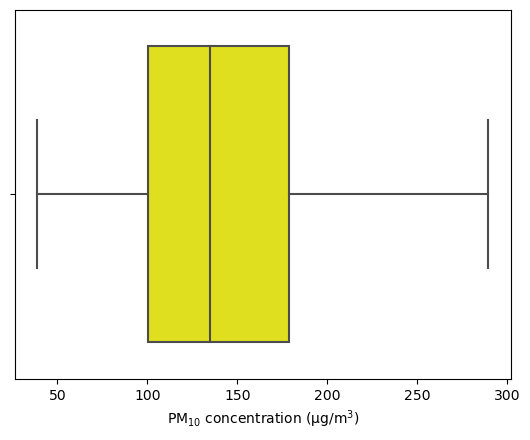

In [5]:
ax = sns.boxplot(data=df,x=df['PM10'], color = 'Yellow', linewidth = 1.5)
ax.set(xlabel='PM$_{10}$ concentration (µg/m$^{3}$)')
# plt.savefig("Siliguri_PM10_box.png", dpi=1200)

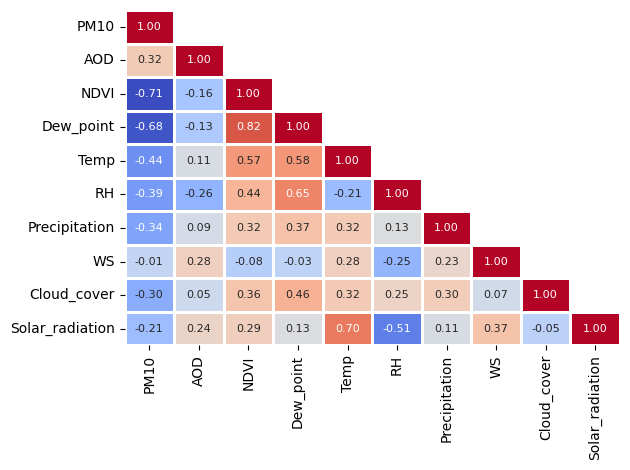

In [6]:
df.corr()
mask = np.triu(np.ones_like(df.corr()))
mask[np.diag_indices_from(mask)] = False
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', linecolor='white', linewidths=1, cbar = False, fmt = '.2f', annot=True, annot_kws={'size': 8},mask=mask)
heatmap
plt.tight_layout()
# plt.savefig("Siliguri_corr.png", dpi=800)

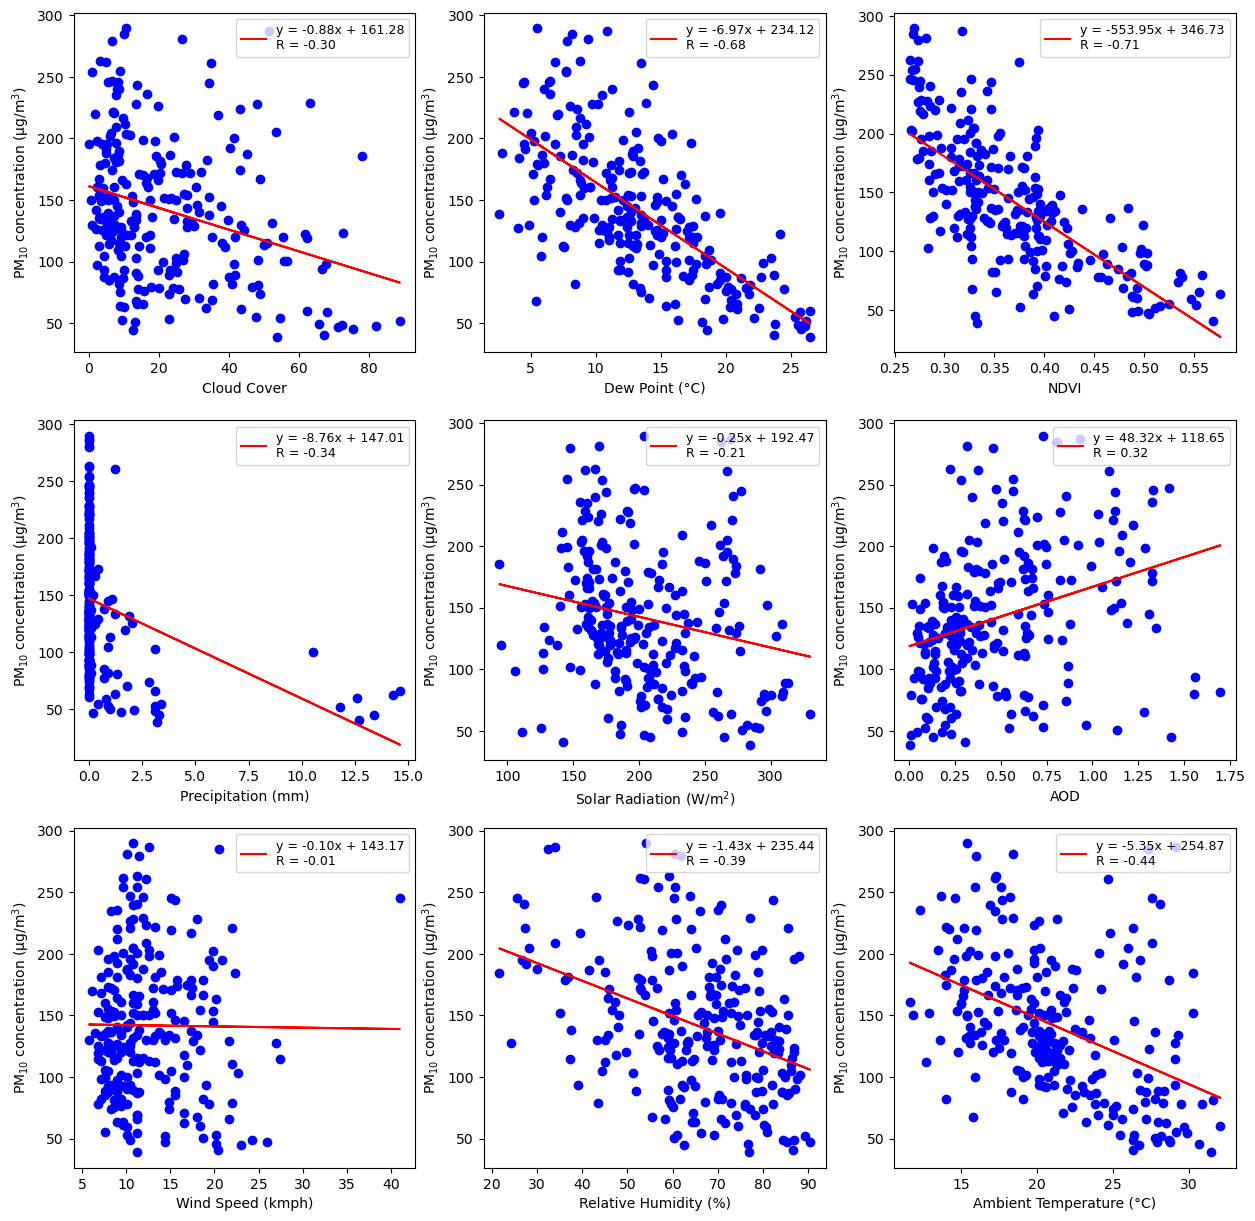

In [7]:
y = df['PM10']
x1 = df['Cloud_cover']
x2 = df['Dew_point']
x3 = df['NDVI']
x4 = df['Precipitation']
x5 = df['Solar_radiation']
x6 = df['AOD']
x7 = df['WS']
x8 = df['RH']
x9 = df['Temp']
fig, ax = plt.subplots(3, 3, figsize=(15,15))
ax[0, 0].scatter(x1, y, color='blue')
ax[0, 0].set(xlabel="Cloud Cover", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y)
line = slope*np.array(x1) + intercept
ax[0, 0].plot(x1, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[0, 0].legend(fontsize=9, loc='upper right')
ax[0, 1].scatter(x2, y, color='blue')
ax[0, 1].set(xlabel="Dew Point (°C)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y)
line = slope*np.array(x2) + intercept
ax[0, 1].plot(x2, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[0, 1].legend(fontsize=9, loc='upper right')
ax[0, 2].scatter(x3, y, color='blue')
ax[0, 2].set(xlabel="NDVI", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y)
line = slope*np.array(x3) + intercept
ax[0, 2].plot(x3, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[0, 2].legend(fontsize=9, loc='upper right')
ax[1, 0].scatter(x4, y, color='blue')
ax[1, 0].set(xlabel="Precipitation (mm)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y)
line = slope*np.array(x4) + intercept
ax[1, 0].plot(x4, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[1, 0].legend(fontsize=9, loc='upper right')
ax[1, 1].scatter(x5, y, color='blue')
ax[1, 1].set(xlabel="Solar Radiation (W/m$^{2}$)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y)
line = slope*np.array(x5) + intercept
ax[1, 1].plot(x5, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[1, 1].legend(fontsize=9, loc='upper right')
ax[1, 2].scatter(x6, y, color='blue')
ax[1, 2].set(xlabel="AOD", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x6,y)
line = slope*np.array(x6) + intercept
ax[1, 2].plot(x6, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[1, 2].legend(fontsize=9, loc='upper right')
ax[2, 0].scatter(x7, y, color='blue')
ax[2, 0].set(xlabel="Wind Speed (kmph)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x7,y)
line = slope*np.array(x7) + intercept
ax[2, 0].plot(x7, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[2, 0].legend(fontsize=9, loc='upper right')
ax[2, 1].scatter(x8, y, color='blue')
ax[2, 1].set(xlabel="Relative Humidity (%)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x8,y)
line = slope*np.array(x8) + intercept
ax[2, 1].plot(x8, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[2, 1].legend(fontsize=9, loc='upper right')
ax[2, 2].scatter(x9, y, color='blue')
ax[2, 2].set(xlabel="Ambient Temperature (°C)", ylabel="PM$_{10}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x9,y)
line = slope*np.array(x9) + intercept
ax[2, 2].plot(x9, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
ax[2, 2].legend(fontsize=9, loc='upper right')
# plt.savefig("Siliguri_scatters.png", dpi=800)

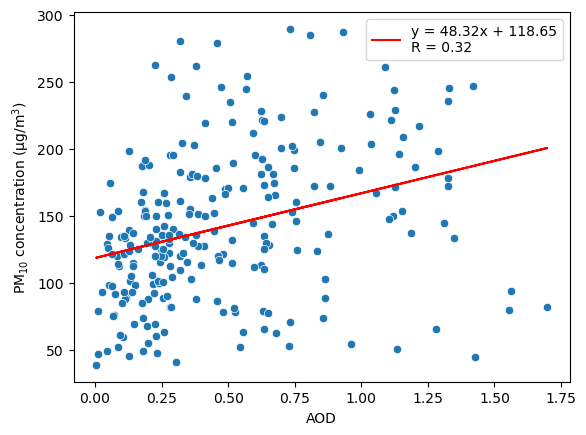

In [8]:
x=df['AOD']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='AOD',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=10, loc='upper right')
plt.savefig("AOD.png", dpi=1200)

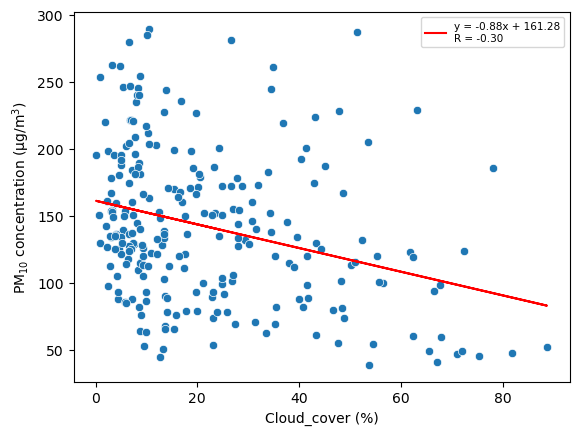

In [9]:
x=df['Cloud_cover']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Cloud_cover (%)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=7.5, loc='upper right')
# plt.savefig("Cloud_cover.png", dpi=1000)

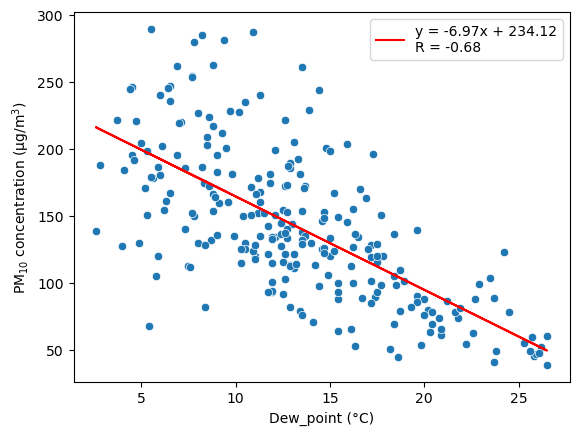

In [10]:
x=df['Dew_point']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Dew_point (°C)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=10, loc='upper right')
plt.savefig("Dew_point.png", dpi=1200)

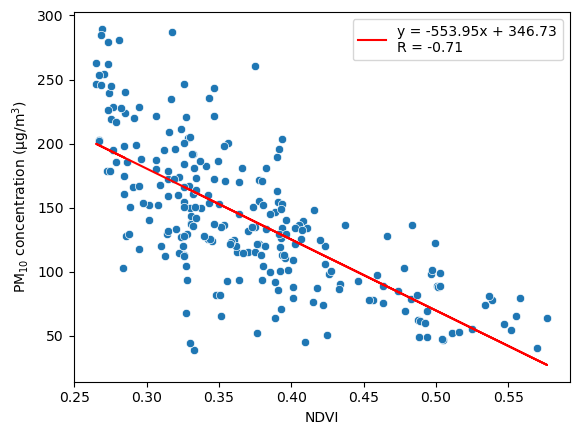

In [11]:
x=df['NDVI']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='NDVI',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=10, loc='upper right')
plt.savefig("NDVI.png", dpi=1200)

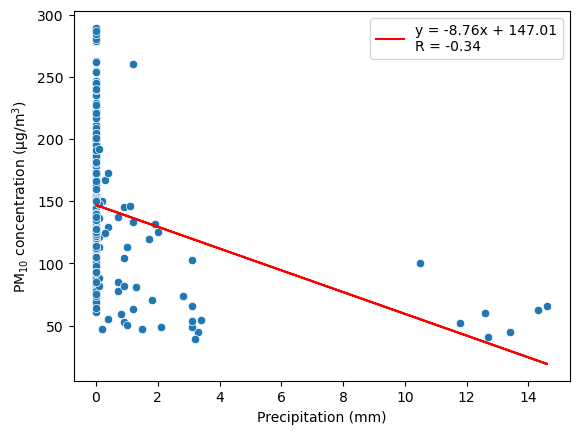

In [12]:
x=df['Precipitation']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Precipitation (mm)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=10, loc='upper right')
plt.savefig("Precipitation.png", dpi=1200)

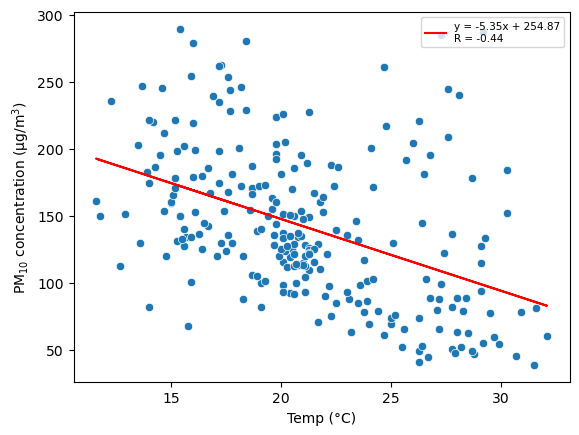

In [13]:
x=df['Temp']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Temp (°C)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=7.5, loc='upper right')
# plt.savefig("Temp.png", dpi=1000)

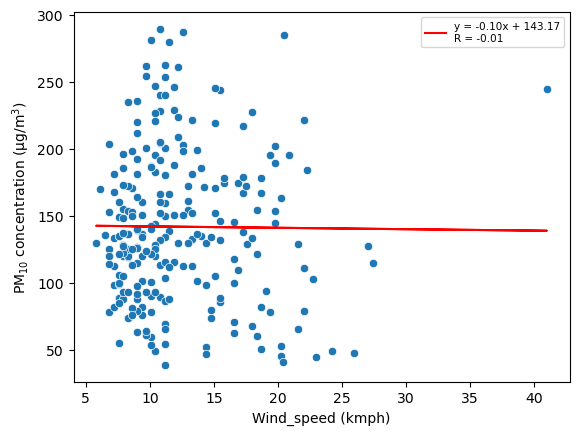

In [14]:
x=df['WS']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Wind_speed (kmph)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=7.5, loc='upper right')
# plt.savefig("Wind_speed.png", dpi=1000)

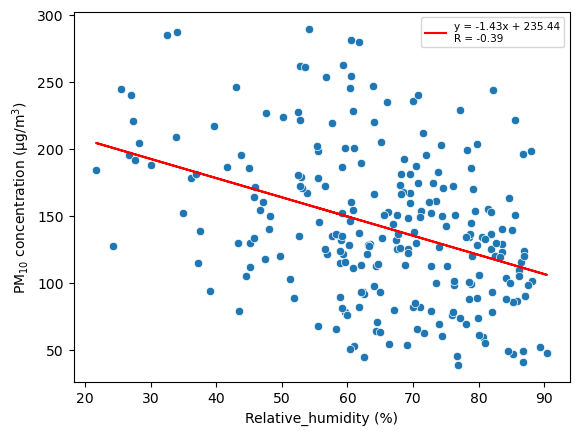

In [15]:
x=df['RH']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Relative_humidity (%)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=7.5, loc='upper right')
# plt.savefig("RH.png", dpi=1000)

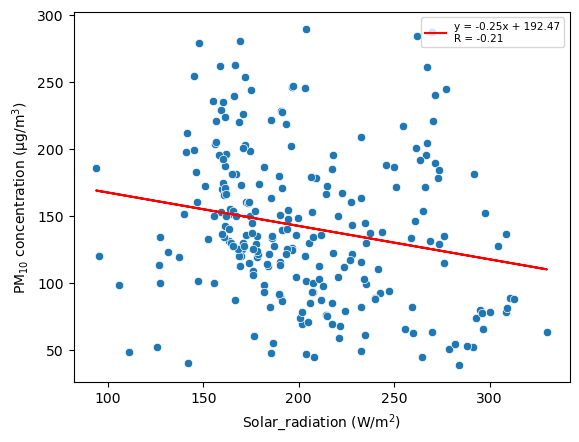

In [16]:
x=df['Solar_radiation']
y=df['PM10']
ax = sns.scatterplot(data=df,x=x, y=y)
ax.set(xlabel='Solar_radiation (W/m$^{2}$)',
       ylabel='PM$_{10}$ concentration (µg/m$^{3}$)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.plot(x, line, 'r', label='y = {:.2f}x + {:.2f}\nR = {:.2f}'.format(slope,intercept,r_value))
plt.legend(fontsize=7.5, loc='upper right')
# plt.savefig("SR.png", dpi=1000)

In [8]:
import statsmodels.api as sm
y = df['PM10']
da = df[['AOD', 'Cloud_cover', 'Dew_point', 'NDVI','Precipitation', 'Solar_radiation', 'WS', 'RH', 'Temp']]
X = sm.add_constant(da)
mod = sm.OLS(y, X)
mod_res = mod.fit()
x = mod_res.summary()
x

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     41.54
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.79e-44
Time:                        10:05:46   Log-Likelihood:                -1218.6
No. Observations:                 245   AIC:                             2457.
Df Residuals:                     235   BIC:                             2492.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             212.8001     79.674      2.671      0.008      55.834     369.767
AOD                42.4894      6.771      6.275      0.000      29.149      55.830
Cloud_cover        -0.0815      0.145     -0.561      0.575      -0.368       0.205
Dew_point          -6.6689      3.147     -2.119      0.035     -12.870      -0.468
NDVI             -311.0437     60.699     -5.124      0.000    -430.627    -191.460
Precipitation      -2.7486      1.202     -2.286      0.023      -5.117      -0.380
Solar_radiation    -0.1623      0.094     -1.722      0.086      -0.348       0.023
WS                 -1.0749      0.599     -1.796      0.074      -2.254       0.104
RH                  1.0734      0.946      1.135      0.257      -0.789       2.936
Temp                4.3334      2.735      1.584      0.114      -1.055       9.722
==============================================================================
Omnibus:                        6.030   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.580
Skew:                           0.247   Prob(JB):                       0.0373
Kurtosis:                       3.633   Cond. No.                     7.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import statsmodels.api as sm
y = df['PM10']
da = df[['AOD', 'Dew_point', 'NDVI','Precipitation']]
X = sm.add_constant(da)
mod = sm.OLS(y, X)
mod_res = mod.fit()
mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     87.87
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.10e-46
Time:                        10:05:52   Log-Likelihood:                -1224.7
No. Observations:                 245   AIC:                             2459.
Df Residuals:                     240   BIC:                             2477.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           285.8434     14.995     19.062      0.000     256.305     315.382
AOD              35.1059      6.428      5.461      0.000      22.443      47.768
Dew_point        -2.4635      0.747     -3.299      0.001      -3.934      -0.993
NDVI           -341.3377     55.404     -6.161      0.000    -450.479    -232.197
Precipitation    -3.4085      1.143     -2.983      0.003      -5.659      -1.158
==============================================================================
Omnibus:                        3.820   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                4.504
Skew:                           0.075   Prob(JB):                        0.105
Kurtosis:                       3.647   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We will keep this dataset (245 data points)

# Checking Multicollinearity

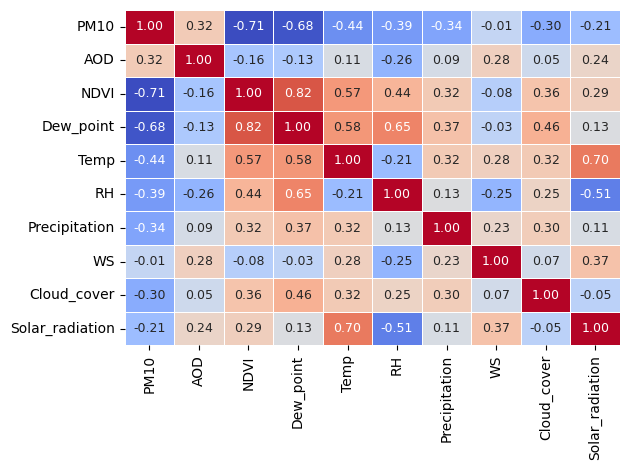

In [19]:
df.corr()
mask = np.triu(np.ones_like(df.corr()))
mask[np.diag_indices_from(mask)] = False
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', linecolor='white', linewidths=0.5, cbar = False, fmt = '.2f', annot=True, annot_kws={'size': 9})
heatmap
plt.tight_layout()
# plt.savefig("Siliguri_corr.png", dpi=800)

In [20]:
x = df.iloc[:,2:]
y = df.iloc[:,1]
x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,AOD,NDVI,Dew_point,Temp,RH,Precipitation,WS,Cloud_cover,Solar_radiation
229,0.140,0.3636,11.7,20.1,62.1,0.0,8.3,4.5,182.0
209,0.876,0.4836,18.4,27.8,58.2,0.1,13.7,13.4,308.5
96,0.278,0.4990,24.2,27.4,83.5,0.0,8.3,61.7,217.7
168,0.199,0.4015,20.0,23.1,84.2,0.0,9.0,4.5,211.6
84,0.635,0.3955,13.1,21.8,60.9,0.0,22.0,17.4,241.5


In [21]:
y_train.head()

229     93.22
209    136.77
96     122.71
168     87.76
84     110.78
Name: PM10, dtype: float64

In [22]:
def correlation(df,threshold):
    corr_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_cols.add(colname)
    return corr_cols

correlation(x_train,0.6)

{'Dew_point', 'RH', 'Solar_radiation'}

# Check important features using feature selection and running the model

# LINEAR REGRESSION

In [56]:
#  LINEAR REGRESSION

# CHECK FOR RANDOM STATE

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
df.head()
X = np.array(df[['AOD', 'Dew_point', 'NDVI','Precipitation']])
# X.shape
Y = np.array(df['PM10'])
# Y.shape
random_states = np.arange(start=0, stop=245)
train_scores = []
test_scores = []
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = state)
    from sklearn.linear_model import LinearRegression
    LR = LinearRegression()
    model = LR.fit(X_train, Y_train.ravel())
    train_scores.append(LR.score(X_train, Y_train))
    test_scores.append(LR.score(X_test, Y_test))

results = pd.DataFrame({'random_state':random_states, 'Train':train_scores, 'Test':test_scores})
results
results.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_state_PM10_LR_new.csv')

Random state for LR train test split = 112

Now putting important parameters in Regression and checking important parameters using p-values

In [11]:
# 1st iteration

import statsmodels.api as sm
y = df['PM10']
da = df[['AOD', 'NDVI', 'Dew_point', 'Precipitation']]
X = sm.add_constant(da)
mod = sm.OLS(y, X)
mod_res = mod.fit()
mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     87.87
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.10e-46
Time:                        10:10:06   Log-Likelihood:                -1224.7
No. Observations:                 245   AIC:                             2459.
Df Residuals:                     240   BIC:                             2477.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           285.8434     14.995     19.062      0.000     256.305     315.382
AOD              35.1059      6.428      5.461      0.000      22.443      47.768
NDVI           -341.3377     55.404     -6.161      0.000    -450.479    -232.197
Dew_point        -2.4635      0.747     -3.299      0.001      -3.934      -0.993
Precipitation    -3.4085      1.143     -2.983      0.003      -5.659      -1.158
==============================================================================
Omnibus:                        3.820   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                4.504
Skew:                           0.075   Prob(JB):                        0.105
Kurtosis:                       3.647   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
import time

LR Train score:  0.5918114191232471
LR Test score:  0.5874430857275665
Training time for LR =  0.4565751552581787 seconds
Testing time for LR =  0.0010008811950683594 seconds
LR R2:  0.5874430857275665
LR RMSE:  41.53545344315206
LR MAE:  31.55250611255822
intercept: 288.07478274424716
coefficients: [  30.98555153   -1.90993597   -3.36102733 -362.83328689]


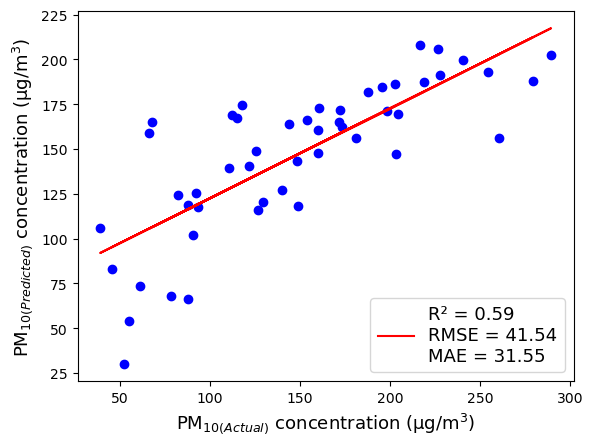

In [5]:
#80:20 DATASET

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 112)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
start_train_time = time.time()
model = LR.fit(X_train, Y_train.ravel())
end_train_time = time.time()
training_time = end_train_time - start_train_time 
print('LR Train score: ', LR.score(X_train,Y_train))
print('LR Test score: ', LR.score(X_test,Y_test))
print('Training time for LR = ', training_time , 'seconds')

from math import sqrt
data_new = pd.read_csv('data_new.csv')
start_test_time = time.time()
y_pred_LR = LR.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

print('Testing time for LR = ', test_time , 'seconds')
print('LR R2: ', r2_score(Y_test, y_pred_LR))
print('LR RMSE: ', sqrt(mean_squared_error(Y_test, y_pred_LR)))
print('LR MAE: ', mean_absolute_error(Y_test, y_pred_LR))
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
x = Y_test
y = y_pred_LR
plt.scatter(x = Y_test, y = y_pred_LR, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)", fontsize=13)
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)", fontsize=13)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
R2 = r2_score(Y_test, y_pred_LR)
RMSE = sqrt(mean_squared_error(Y_test, y_pred_LR))
MAE = mean_absolute_error(Y_test, y_pred_LR)
plt.plot(x, line, color='red', label='R² = {:.2f}\nRMSE = {:.2f}\nMAE = {:.2f}'.format(R2, RMSE, MAE))
plt.legend(fontsize=13, loc='lower right')
plt.show

data_new['pred'] = y_pred_LR
data_new['test'] = Y_test
data_new.to_csv('LR.csv')
#plt.savefig("PM10_LR_Actual vs pred.png", dpi=1000)

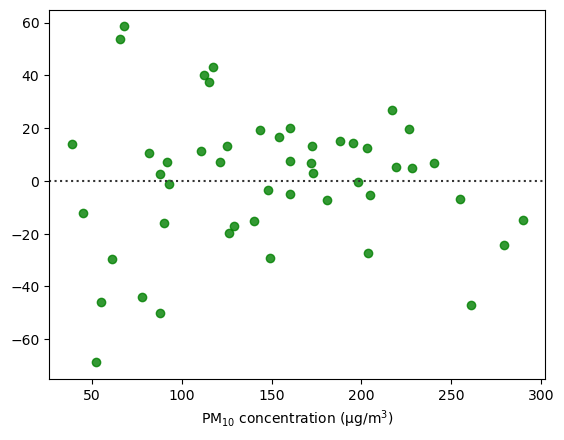

1.7107680580978557


In [6]:
x = Y_test
y = y_pred_LR
plt.xlabel("PM$_{10}$ concentration (µg/m$^{3}$)")
sns.residplot(x=x, y=y, lowess=False, color="g")
# plt.savefig("PM10_LR_Residuals.png", dpi=800)
plt.show()

import statistics
residual = (x - y)
mean_residuals = statistics.mean(residual)
print(mean_residuals)


Checking testing of LR with Jalpaiguri dataset as test and Siliguri as train data

LR Train score:  0.5942405054820841
LR Test score:  -2.7728449568659417
Training time for LR =  0.0009822845458984375 seconds
Testing time for LR =  0.0 seconds
[103.41257108 114.47926406 124.75392226 148.05549275 116.52579808
 136.4836519  112.29798456 122.57515363 121.05089126 123.28057734
 129.00046722 126.99451544 119.60069638  49.77308933  72.79074896
   3.49317535  32.80293109  41.6500493   42.2602103   53.9375895
  58.72273453  89.35011589  90.64239178 102.210246   121.71020913]
LR RMSE:  35.635449814948274
LR MAE:  27.034731388382873
LR R2:  -2.7728449568659417


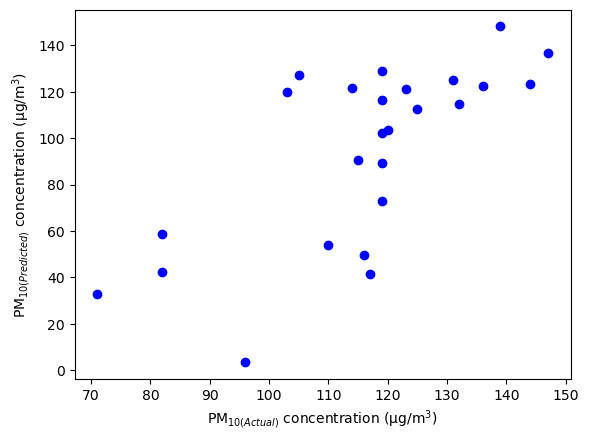

In [8]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 112)

df1 = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Jalpaiguri final dataset.xlsx', sheet_name = 'PM10', parse_dates=['Date'])

X1 = np.array(df1[['AOD','Dew_point','Precipitation','NDVI']])
Y1 = np.array(df1['PM10'])

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
start_train_time = time.time()
model = LR.fit(X, Y.ravel())
end_train_time = time.time()
training_time = end_train_time - start_train_time 
print('LR Train score: ', LR.score(X,Y))
print('LR Test score: ', LR.score(X1,Y1))
print('Training time for LR = ', training_time , 'seconds')

from math import sqrt
data_new = pd.read_csv('data_new.csv')
start_test_time = time.time()
y_pred_LR1 = LR.predict(X1)
end_test_time = time.time()
test_time = end_test_time - start_test_time

print('Testing time for LR = ', test_time , 'seconds')

results = y_pred_LR1

#y_pred_LR1.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_PM10.csv')
print(y_pred_LR1)

print('LR RMSE: ', sqrt(mean_squared_error(Y1, y_pred_LR1)))
print('LR MAE: ', mean_absolute_error(Y1, y_pred_LR1))
print('LR R2: ', r2_score(Y1, y_pred_LR1))

x = Y1
y = y_pred_LR1
plt.scatter(x = Y1, y = y_pred_LR1, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
plt.show()

data_new['test'] = Y1
data_new['pred'] = y_pred_LR1
data_new.to_csv('LR_Jal.csv')

# SUPPORT VECTOR REGRESSION

In [95]:
# SUPPORT VECTOR REGRESSION

# CHECK FOR RANDOM STATE

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
df.head()
X = np.array(df[['AOD', 'Dew_point', 'NDVI','Precipitation']])
# X.shape
Y = np.array(df['PM10'])
# Y.shape
random_states = np.arange(start=0, stop=245)
train_scores = []
test_scores = []
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = state)
    from sklearn.svm import SVR
    svr_lin = SVR(kernel = 'linear')
    model = svr_lin.fit(X_train, Y_train.ravel())
    train_scores.append(svr_lin.score(X_train, Y_train))
    test_scores.append(svr_lin.score(X_test, Y_test))

results = pd.DataFrame({'random_state':random_states, 'Train':train_scores, 'Test':test_scores})
results
#results.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_state_PM10_SVR.csv')

,random_state,Train,Test
0,0,0.509975,0.345836
1,1,0.480366,0.527202
2,2,0.523293,0.301016
3,3,0.521976,0.331536
4,4,0.483239,0.521820
...,...,...,...
240,240,0.484815,0.465546
241,241,0.514420,0.359607
242,242,0.461971,0.601912
243,243,0.490942,0.508795


Random state = 20 for train test split

Parameter checking and hyperparameter tuning

In [24]:
print('Parameters currently in use:\n')
pprint(svr_lin.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [19]:
from sklearn.svm import SVR
svr = SVR()

from sklearn.model_selection import GridSearchCV

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 20)

# Create the parameter grid 
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5, 6],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1.0, 1.5]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train.ravel())
grid_search.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'C': 100, 'degree': 3, 'epsilon': 0.1, 'kernel': 'linear'}

SVR Train score:  0.5368468970965248
SVR Test score:  0.5049530652640017
SVR R2:  0.5049530652640017
SVR RMSE:  40.04384086712896
SVR MAE:  28.181861651302533


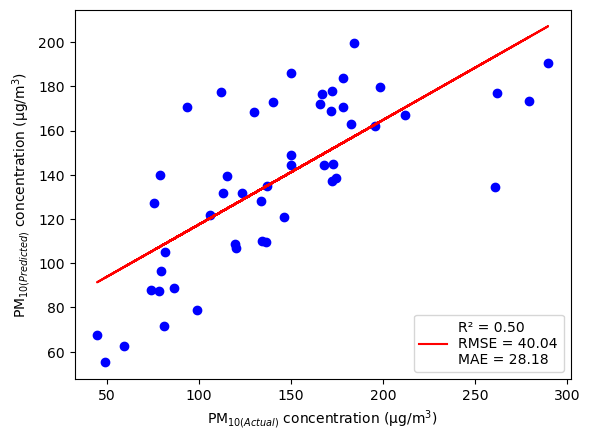

In [14]:
# with hyperparameter tuning (80:20)

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 20)

from sklearn.svm import SVR
svr_lin = SVR(C = 100, epsilon = 0.1, degree = 3, kernel = "rbf")
svr_lin.fit(X_train, Y_train.ravel())
print('SVR Train score: ', svr_lin.score(X_train,Y_train))
print('SVR Test score: ', svr_lin.score(X_test,Y_test)) 
y_pred_SVR_Line = svr_lin.predict(X_test)

print('SVR R2: ', r2_score(Y_test, y_pred_SVR_Line))
print('SVR RMSE: ', sqrt(mean_squared_error(Y_test, y_pred_SVR_Line)))
print('SVR MAE: ', mean_absolute_error(Y_test, y_pred_SVR_Line))

x = Y_test
y = y_pred_SVR_Line
data_new = pd.read_csv('data_new.csv')
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
R2 = r2_score(Y_test, y_pred_SVR_Line)
RMSE = sqrt(mean_squared_error(Y_test, y_pred_SVR_Line))
MAE = mean_absolute_error(Y_test, y_pred_SVR_Line)
plt.plot(x, line, color='red', label='R² = {:.2f}\nRMSE = {:.2f}\nMAE = {:.2f}'.format(R2, RMSE, MAE))
plt.legend(fontsize=10, loc='lower right')
plt.show

data_new['pred'] = y_pred_SVR_Line
data_new['test'] = Y_test

data_new.to_csv('SVR_Line.csv')
# plt.savefig("PM10_SVR_hypr_tuned_Actual vs pred.png", dpi=800)

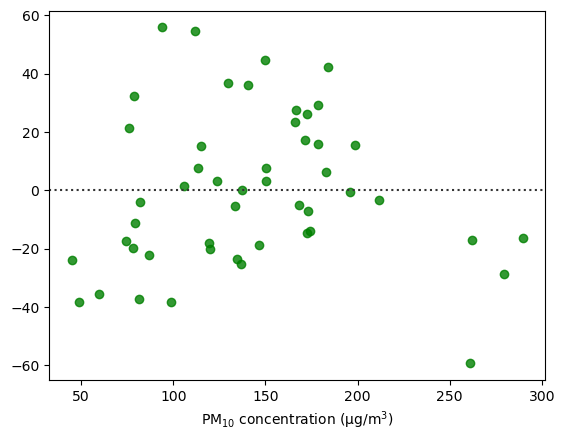

4.98767590244952


In [15]:
x = Y_test
y = y_pred_SVR_Line
sns.residplot(x=x, y=y, color='green')
plt.xlabel("PM$_{10}$ concentration (µg/m$^{3}$)")

# plt.savefig("PM10_SVR_hypr_residuals.png", dpi=800)
plt.show()

import statistics
residual = (x - y)
mean_residuals = statistics.mean(residual)
print (mean_residuals)


Checking testing of SVR with Jalpaiguri dataset as test and Siliguri as train data

SVR Train score:  0.532743508340819
SVR Test score:  -3.7619051426770795
SVR R2:  -3.7619051426770795
SVR RMSE:  40.0348435689594
SVR MAE:  34.996059387371915


ValueError: Length of values (25) does not match length of index (49)

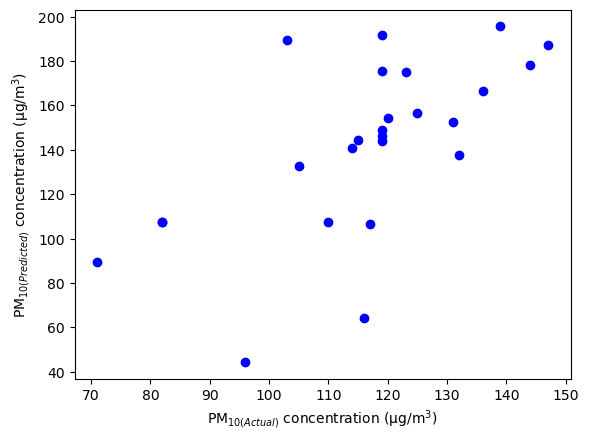

In [16]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])

df1 = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Jalpaiguri final dataset.xlsx', sheet_name = 'PM10', parse_dates=['Date'])

X1 = np.array(df1[['AOD','Dew_point','Precipitation','NDVI']])
Y1 = np.array(df1['PM10'])

from sklearn.svm import SVR
svr_lin = SVR(C = 100, epsilon = 0.1, degree = 3, kernel = "rbf")
svr_lin.fit(X, Y.ravel())

print('SVR Train score: ', svr_lin.score(X,Y))
print('SVR Test score: ', svr_lin.score(X1,Y1)) 

y_pred_SVR_Line1 = svr_lin.predict(X1)

print('SVR R2: ', r2_score(Y1, y_pred_SVR_Line1))
print('SVR RMSE: ', sqrt(mean_squared_error(Y1, y_pred_SVR_Line1)))
print('SVR MAE: ', mean_absolute_error(Y1, y_pred_SVR_Line1))

x = Y1
y = y_pred_SVR_Line1
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")

plt.show

data_new['test'] = Y1
data_new['pred'] = y_pred_SVR_Line1
data_new.to_csv('SVR_Line_Jal.csv')

# RANDOM FOREST

In [97]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5, 7, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_state = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
random_state.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state': random_state}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 5, 7, 9, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
  

In [47]:
#  RUNNING RANDOM FOREST WITH SELECTED PARAMETERS ONLY

# selecting Random state

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']

random_states = np.arange(start=0, stop=245)
train_scores = []
test_scores = []
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = state)
    model = RF.fit(X_train, Y_train.ravel())
    train_scores.append(RF.score(X_train, Y_train))
    test_scores.append(RF.score(X_test, Y_test))

results = pd.DataFrame({'random_state':random_states, 'Train':train_scores, 'Test':test_scores})
results
results.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_RF_Selecetd parameters_PM10.csv')

Random state = 137 for train test

In [68]:
# Randomised search selected params

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 137)
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 5, random_state = 42, verbose=2, n_jobs = -1)
rf_random.fit(X_train, Y_train.ravel())
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'random_state': 120,
 'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [100]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 137)

Y_test

91      60.27
160     77.91
45     195.98
228    114.29
88     189.72
224    133.35
212     53.31
234    125.48
62     112.42
122    195.70
194    125.57
80     115.11
60     151.75
143    216.84
188    129.76
39     101.61
231    134.88
23     145.10
27      89.12
53     174.24
102    134.42
58     150.29
195    135.76
191    186.77
181    120.03
4      262.71
182    134.07
42      90.51
157     54.44
197    172.30
163     47.55
63     129.85
135    226.41
31      62.52
196    104.90
236    127.98
146    240.44
123    131.65
111    119.78
172    115.45
144    284.69
162     47.00
177    101.60
136    195.34
50     243.80
5      261.85
109    144.85
127    239.78
145    244.94
Name: PM10, dtype: float64

[0.14602904 0.33412574 0.07446825 0.44537697]
RF Train score:  0.8386883628863985
RF Test score:  0.8254216716137535
91      60.27
160     77.91
45     195.98
228    114.29
88     189.72
224    133.35
212     53.31
234    125.48
62     112.42
122    195.70
194    125.57
80     115.11
60     151.75
143    216.84
188    129.76
39     101.61
231    134.88
23     145.10
27      89.12
53     174.24
102    134.42
58     150.29
195    135.76
191    186.77
181    120.03
4      262.71
182    134.07
42      90.51
157     54.44
197    172.30
163     47.55
63     129.85
135    226.41
31      62.52
196    104.90
236    127.98
146    240.44
123    131.65
111    119.78
172    115.45
144    284.69
162     47.00
177    101.60
136    195.34
50     243.80
5      261.85
109    144.85
127    239.78
145    244.94
Name: PM10, dtype: float64
RF R2:  0.8254216716137535
RF RMSE:  25.51031876410659
RF MAE:  20.94854729049371


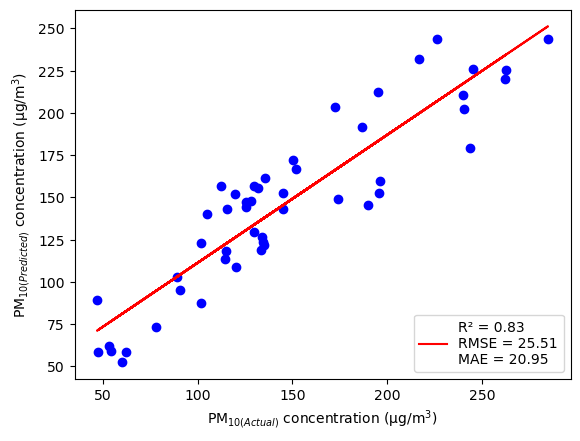

In [18]:
# RF with hyperparameter tuning and selected parameters (80:20)

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 137)

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 140,
                           max_depth = 30,
                           min_samples_leaf = 2,
                           min_samples_split = 9)
                           

    
RF.fit(X_train, Y_train.ravel())
print(RF.feature_importances_)
print('RF Train score: ', RF.score(X_train,Y_train))
print('RF Test score: ', RF.score(X_test,Y_test)) 
y_pred_RF = RF.predict(X_test)

print(Y_test)
print('RF R2: ', r2_score(Y_test, y_pred_RF))
print('RF RMSE: ', sqrt(mean_squared_error(Y_test, y_pred_RF)))
print('RF MAE: ', mean_absolute_error(Y_test, y_pred_RF))

from math import sqrt
data_new = pd.read_csv('data_new.csv')

data_new['test'] = Y_test

x = Y_test
y = y_pred_RF
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
R2 = r2_score(Y_test, y_pred_RF)
RMSE = sqrt(mean_squared_error(Y_test, y_pred_RF))
MAE = mean_absolute_error(Y_test, y_pred_RF)
plt.plot(x, line, color='red', label='R² = {:.2f}\nRMSE = {:.2f}\nMAE = {:.2f}'.format(R2, RMSE, MAE))
plt.legend(fontsize=10, loc='lower right')
plt.show

data_new['pred'] = y_pred_RF

data_new.to_csv('RF.csv')

# plt.savefig("PM10_RF_hypr_tun_selected sample_Actual vs pred.png", dpi=1000)

Checking testing of RF with Jalpaiguri dataset as test and Siliguri as train data

[0.14519015 0.27880079 0.06463173 0.51137733]
RF Train score:  0.8582754616970121
RF Test score:  0.14986138918885195
RF R2:  0.14986138918885195
RF RMSE:  16.91580368776597
RF MAE:  13.88605745975919


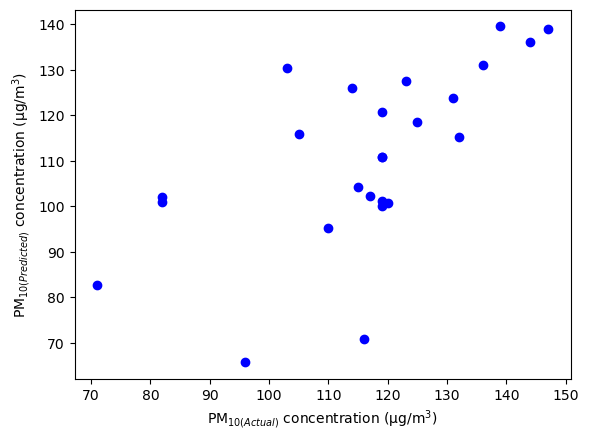

In [19]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])

df1 = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Jalpaiguri final dataset.xlsx', sheet_name = 'PM10', parse_dates=['Date'])

X1 = np.array(df1[['AOD','Dew_point','Precipitation','NDVI']])
Y1 = np.array(df1['PM10'])


from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 140,
                           max_depth = 30,
                           min_samples_leaf = 2,
                           min_samples_split = 9)
                           
                         
RF.fit(X, Y)
print(RF.feature_importances_)

print('RF Train score: ', RF.score(X,Y))
print('RF Test score: ', RF.score(X1,Y1)) 

y_pred_RF1 = RF.predict(X1)

print('RF R2: ', r2_score(Y1, y_pred_RF1))
print('RF RMSE: ', sqrt(mean_squared_error(Y1, y_pred_RF1)))
print('RF MAE: ', mean_absolute_error(Y1, y_pred_RF1))

from math import sqrt
data_new = pd.read_csv('data_new.csv')

x = Y1
y = y_pred_RF1
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")

plt.show

data_new['pred'] = y_pred_RF1
data_new['test'] = Y1

data_new.to_csv('RF_Jal.csv')

# GRADIENT BOOSTING 

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()

print('Parameters currently in use:\n')
pprint(GB.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [75]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']

random_states = np.arange(start=0, stop=245)
train_scores = []
test_scores = []
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = state)
    model = GB.fit(X_train, Y_train.ravel())
    train_scores.append(GB.score(X_train, Y_train))
    test_scores.append(GB.score(X_test, Y_test))

results = pd.DataFrame({'random_state':random_states, 'Train':train_scores, 'Test':test_scores})
results
results.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_GB_selected_PM10.csv')

Random state 137 train test split

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5, 7, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting random state
random_state = [int(x) for x in np.linspace(10, 200, num = 10)]
random_state.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 5, 7, 9, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None]}


In [44]:
# Randomised search selected parameters
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
gb_random = RandomizedSearchCV(estimator = GB, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state = 52, n_jobs = -1)
gb_random.fit(X_train, Y_train.ravel())
gb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'random_state': 94,
 'n_estimators': 1400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

[0.21035621 0.28049021 0.09835052 0.41080306]
GB Train score:  1.0
GB Test score:  0.8031629623100134
GB R2:  0.8031629623100134
GB RMSE:  27.087824700955274
GB MAE:  23.052297494991613


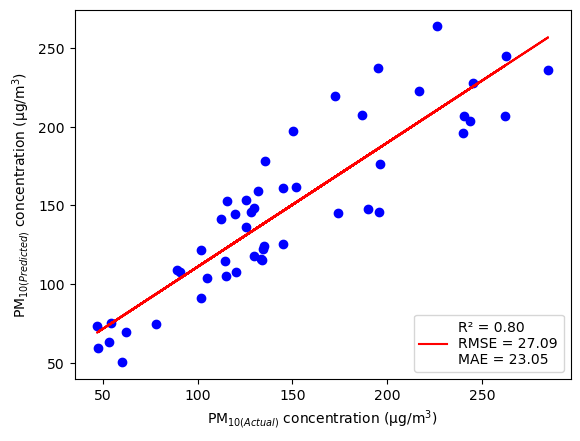

In [20]:
# GB with hyperparameter tuning and selected parameters (80:20)

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 137)

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(max_depth = None,
                               max_features = 'sqrt',
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                               n_estimators = 1800,
                               random_state = 94)

GB.fit(X_train, Y_train.ravel())
print(GB.feature_importances_)
print('GB Train score: ', GB.score(X_train,Y_train))
print('GB Test score: ', GB.score(X_test,Y_test)) 
y_pred_GB = GB.predict(X_test)

print('GB R2: ', r2_score(Y_test, y_pred_GB))
print('GB RMSE: ', sqrt(mean_squared_error(Y_test, y_pred_GB)))
print('GB MAE: ', mean_absolute_error(Y_test, y_pred_GB))

from math import sqrt
data_new = pd.read_csv('data_new.csv')

data_new['test'] = Y_test
x = Y_test
y = y_pred_GB
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
R2 = r2_score(Y_test, y_pred_GB)
RMSE = sqrt(mean_squared_error(Y_test, y_pred_GB))
MAE = mean_absolute_error(Y_test, y_pred_GB)
plt.plot(x, line, color='red', label='R² = {:.2f}\nRMSE = {:.2f}\nMAE = {:.2f}'.format(R2, RMSE, MAE))
plt.legend(fontsize=10, loc='lower right')
plt.show

data_new['pred'] = y_pred_GB

data_new.to_csv('GB.csv')

# plt.savefig("PM10_GB_hypr tuned_selected params_Actual vs pred.png", dpi=800)

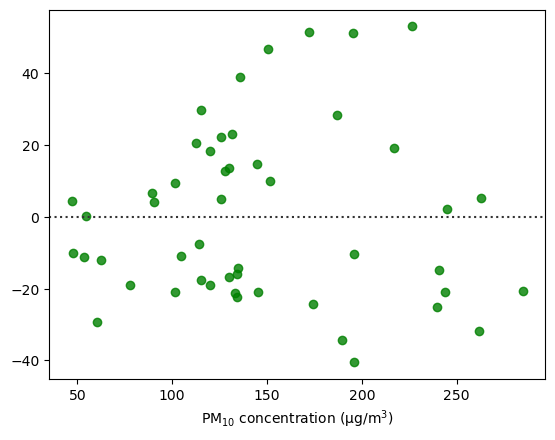

-1.206064143941821

In [21]:
x = Y_test
y = y_pred_GB

sns.residplot(x=x, y=y, color='green')
plt.xlabel("PM$_{10}$ concentration (µg/m$^{3}$)")
plt.show()

import statistics
residual = (x - y)
mean_residuals = statistics.mean(residual)
mean_residuals

# plt.savefig("PM10_GB_hypr tuned_selected params_residual.png", dpi=800)


Checking testing of GB with Jalpaiguri dataset as test and Siliguri as train data

[0.16046893 0.25554278 0.12486184 0.45912645]
GB Train score:  1.0
GB Test score:  -0.7680247308198989
GB R2:  -0.7680247308198989
GB RMSE:  24.39450070892729
GB MAE:  20.930434185657802


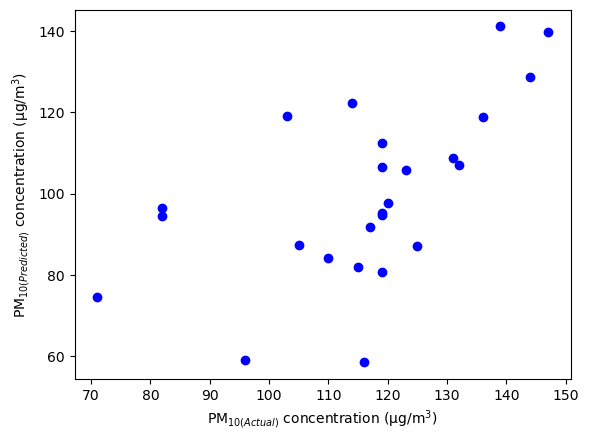

In [22]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])

df1 = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Jalpaiguri final dataset.xlsx', sheet_name = 'PM10', parse_dates=['Date'])

X1 = np.array(df1[['AOD','Dew_point','Precipitation','NDVI']])
Y1 = np.array(df1['PM10'])


from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(max_depth = None,
                               max_features = 'sqrt',
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                               n_estimators = 1800,
                               random_state = 94)

GB.fit(X, Y.ravel())
print(GB.feature_importances_)
print('GB Train score: ', GB.score(X,Y))
print('GB Test score: ', GB.score(X1,Y1)) 

y_pred_GB1 = GB.predict(X1)

print('GB R2: ', r2_score(Y1, y_pred_GB1))
print('GB RMSE: ', sqrt(mean_squared_error(Y1, y_pred_GB1)))
print('GB MAE: ', mean_absolute_error(Y1, y_pred_GB1))

from math import sqrt
data_new = pd.read_csv('data_new.csv')

x = Y1
y = y_pred_GB1
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")

plt.show

data_new['pred'] = y_pred_GB1
data_new['test'] = Y1
data_new.to_csv('GB_Jal.csv')

# EXTREME GRADIENT BOOSTING

In [106]:
import xgboost as xgb
XGB = xgb.XGBRegressor()

print('Parameters currently in use:\n')
pprint(XGB.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [50]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']

random_states = np.arange(start=0, stop=245)
train_scores = []
test_scores = []
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = state)
    model = XGB.fit(X_train, Y_train.ravel())
    train_scores.append(XGB.score(X_train, Y_train))
    test_scores.append(XGB.score(X_test, Y_test))

results = pd.DataFrame({'random_state':random_states, 'Train':train_scores, 'Test':test_scores})
results
results.to_csv('C:/Users/DELL/OneDrive/Desktop/Siliguri/Random_XGB_selected_PM10.csv')

Random state 137 train test split

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in X gradient boosting
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

max_leaves = [int(x) for x in np.linspace(10, 50, num = 11)]
max_leaves.append(None)

# Method of selecting random state
random_state = [int(x) for x in np.linspace(10, 200, num = 10)]
random_state.append(None)

learning_rate = [0.05, 0.1, 0.15, 0.2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_leaves': max_leaves,
               'learning_rate': learning_rate,
               'random_state': random_state}
pprint(random_grid)

{'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_leaves': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000],
 'random_state': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None]}


In [91]:
# Randomised search selected parameters
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
xgb_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state = 52, n_jobs = -1)
xgb_random.fit(X_train, Y_train.ravel())
xgb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'random_state': 136,
 'n_estimators': 100,
 'max_leaves': None,
 'max_depth': 70,
 'learning_rate': 0.05}

[0.03969293 0.21633306 0.48167387 0.2623001 ]
XGB Train score:  0.9999999998061233
XGB Test score:  0.768632273959972
XGB R2:  0.768632273959972
XGB RMSE:  29.36784701215517
XGB MAE:  24.73673807883749


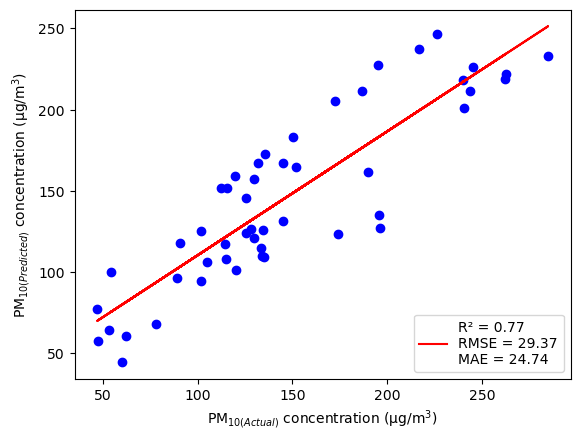

In [23]:
# GB with hyperparameter tuning and selected parameters (80:20)

df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])
X = df[['AOD','Dew_point','Precipitation','NDVI']]
Y = df['PM10']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 137)

import xgboost as xgb
XGB = xgb.XGBRegressor(random_state = 136, n_estimators = 800, max_leaves = 34, max_depth = 20, learning_rate = 0.1)


XGB.fit(X_train, Y_train.ravel())
print(XGB.feature_importances_)
print('XGB Train score: ', XGB.score(X_train,Y_train))
print('XGB Test score: ', XGB.score(X_test,Y_test)) 
y_pred_XGB = XGB.predict(X_test)

print('XGB R2: ', r2_score(Y_test, y_pred_XGB))
print('XGB RMSE: ', sqrt(mean_squared_error(Y_test, y_pred_XGB)))
print('XGB MAE: ', mean_absolute_error(Y_test, y_pred_XGB))

from math import sqrt
data_new = pd.read_csv('data_new.csv')
data_new['test'] = Y_test

x = Y_test
y = y_pred_XGB
plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
R2 = r2_score(Y_test, y_pred_XGB)
RMSE = sqrt(mean_squared_error(Y_test, y_pred_XGB))
MAE = mean_absolute_error(Y_test, y_pred_XGB)
plt.plot(x, line, color='red', label='R² = {:.2f}\nRMSE = {:.2f}\nMAE = {:.2f}'.format(R2, RMSE, MAE))
plt.legend(fontsize=10, loc='lower right')
plt.show

data_new['pred'] = y_pred_XGB
data_new.to_csv('XGB.csv')

# plt.savefig("PM10_XGB_hypr tuned_selected params_Actual vs pred.png", dpi=800)

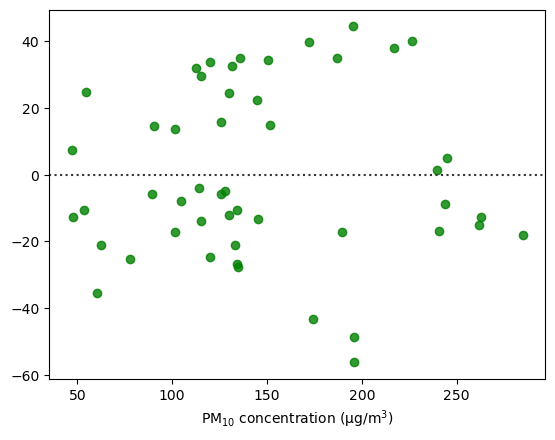

0.5372935672682154

In [24]:
x = Y_test
y = y_pred_XGB

sns.residplot(x=x, y=y, color='green')
plt.xlabel("PM$_{10}$ concentration (µg/m$^{3}$)")
plt.show()

import statistics
residual = (x - y)
mean_residuals = statistics.mean(residual)
mean_residuals

# plt.savefig("PM10_XGB_hypr tuned_selected params_residuals.png", dpi=800)

Checking testing of XGB with Jalpaiguri dataset as test and Siliguri as train data

[0.04890917 0.20828576 0.25799373 0.48481128]
XGB Train score:  0.999999999800618
XGB Test score:  -2.3939516428404053
XGB R2:  -2.3939516428404053
XGB RMSE:  33.798746279653976
XGB MAE:  29.521976928710938


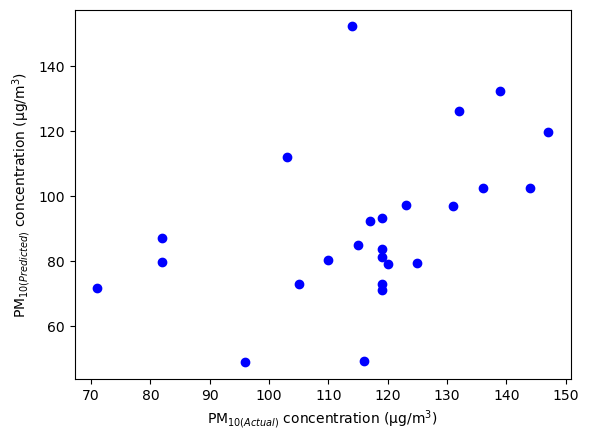

In [26]:
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Raw dataset.xlsx', sheet_name = 'PM10_daily', parse_dates=['Date'])

X = np.array(df[['AOD','Dew_point','Precipitation','NDVI']])
Y = np.array(df['PM10'])

df1 = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\Siliguri\Jalpaiguri final dataset.xlsx', sheet_name = 'PM10', parse_dates=['Date'])

X1 = np.array(df1[['AOD','Dew_point','Precipitation','NDVI']])
Y1 = np.array(df1['PM10'])

import xgboost as xgb
XGB = xgb.XGBRegressor(random_state = 136, n_estimators = 800, max_leaves = 34, max_depth = 20, learning_rate = 0.1)


XGB.fit(X, Y.ravel())
print(XGB.feature_importances_)

print('XGB Train score: ', XGB.score(X,Y))
print('XGB Test score: ', XGB.score(X1, Y1)) 

y_pred_XGB1 = XGB.predict(X1)

print('XGB R2: ', r2_score(Y1, y_pred_XGB1))
print('XGB RMSE: ', sqrt(mean_squared_error(Y1, y_pred_XGB1)))
print('XGB MAE: ', mean_absolute_error(Y1, y_pred_XGB1))

from math import sqrt
data_new = pd.read_csv('data_new.csv')


x = Y1
y = y_pred_XGB1

plt.scatter(x, y, color='blue')
plt.xlabel("PM$_{10 (Actual)}$ concentration (µg/m$^{3}$)")
plt.ylabel("PM$_{10 (Predicted)}$ concentration (µg/m$^{3}$)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x) + intercept
plt.show


data_new['pred'] = y_pred_XGB1
data_new['test'] = Y1

data_new.to_csv('XGB_Jal.csv')